In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
import datetime 
import seaborn as sns
import numpy as np

In [2]:
fname = "/Users/yiwengeng/Downloads/custom-export/PTL01_daily-hr.csv"
df = pd.read_csv(fname, parse_dates = [0])

In [5]:
counts = {}
for i in range(df.shape[0]):
    date = df["timestamp"][i].date()
    hour = df["timestamp"][i].hour
    key = (date,hour)
    counts[key] = counts.get(key, 0) + 1
print(np.max(counts))

{(datetime.date(2023, 6, 9), 17): 7, (datetime.date(2023, 6, 9), 18): 12, (datetime.date(2023, 6, 9), 19): 9, (datetime.date(2023, 6, 9), 20): 12, (datetime.date(2023, 6, 9), 21): 8, (datetime.date(2023, 6, 9), 22): 9, (datetime.date(2023, 6, 9), 23): 6, (datetime.date(2023, 6, 10), 0): 8, (datetime.date(2023, 6, 10), 1): 20, (datetime.date(2023, 6, 10), 2): 6, (datetime.date(2023, 6, 10), 14): 12, (datetime.date(2023, 6, 10), 15): 4, (datetime.date(2023, 6, 10), 16): 3, (datetime.date(2023, 6, 10), 17): 18, (datetime.date(2023, 6, 10), 18): 24, (datetime.date(2023, 6, 10), 19): 30, (datetime.date(2023, 6, 10), 20): 21, (datetime.date(2023, 6, 10), 21): 11, (datetime.date(2023, 6, 10), 22): 18, (datetime.date(2023, 6, 10), 23): 23, (datetime.date(2023, 6, 11), 0): 25, (datetime.date(2023, 6, 11), 1): 12, (datetime.date(2023, 6, 11), 2): 17, (datetime.date(2023, 6, 11), 3): 30, (datetime.date(2023, 6, 11), 4): 6, (datetime.date(2023, 6, 11), 13): 6, (datetime.date(2023, 6, 11), 14): 6, 

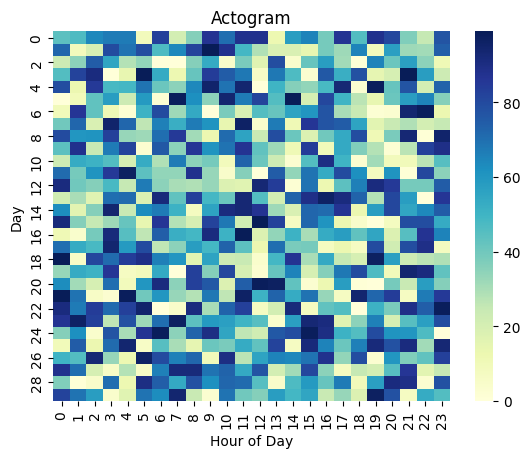

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(0)

# Generate a random time-series data of activity levels
num_days = 30
activity_data = np.random.randint(0, 100, (num_days, 24))  # Let's assume the activity is recorded every hour.

# Create an actogram using seaborn heatmap
sns.heatmap(activity_data, cmap="YlGnBu", cbar=True)

# Set x and y labels
plt.xlabel("Hour of Day")
plt.ylabel("Day")
plt.title("Actogram")

plt.show()

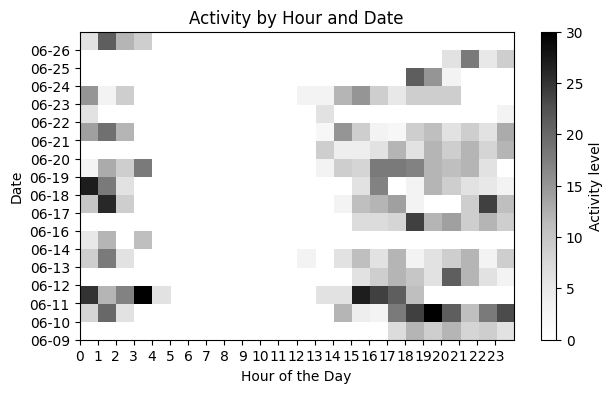

In [33]:
# Create a dictionary to store activity data for each day
day_activity = defaultdict(lambda: [0]*24)

# Store the activity data for each day
for (date, hour), value in counts.items():
    day_activity[date][hour] = value

# Create a list of dates
dates = sorted(day_activity.keys())

# Initialize a 2D array to store activity values
activity_array = np.array([day_activity[date] for date in dates])

fig, ax = plt.subplots(figsize=(7,4))

# Plot activity data
cax = ax.imshow(activity_array, aspect='auto', cmap='Greys', origin='lower', extent=[0, 24, 0, len(dates)])

# Set x ticks to represent hours
ax.set_xticks(range(24))

# Set y ticks to represent dates (without the year)
ax.set_yticks(range(len(dates)))
ax.set_yticklabels([date.strftime('%m-%d') for date in dates])

# Set labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Date')
ax.set_title('Activity by Hour and Date')

plt.colorbar(cax, label='Activity level')

plt.show()

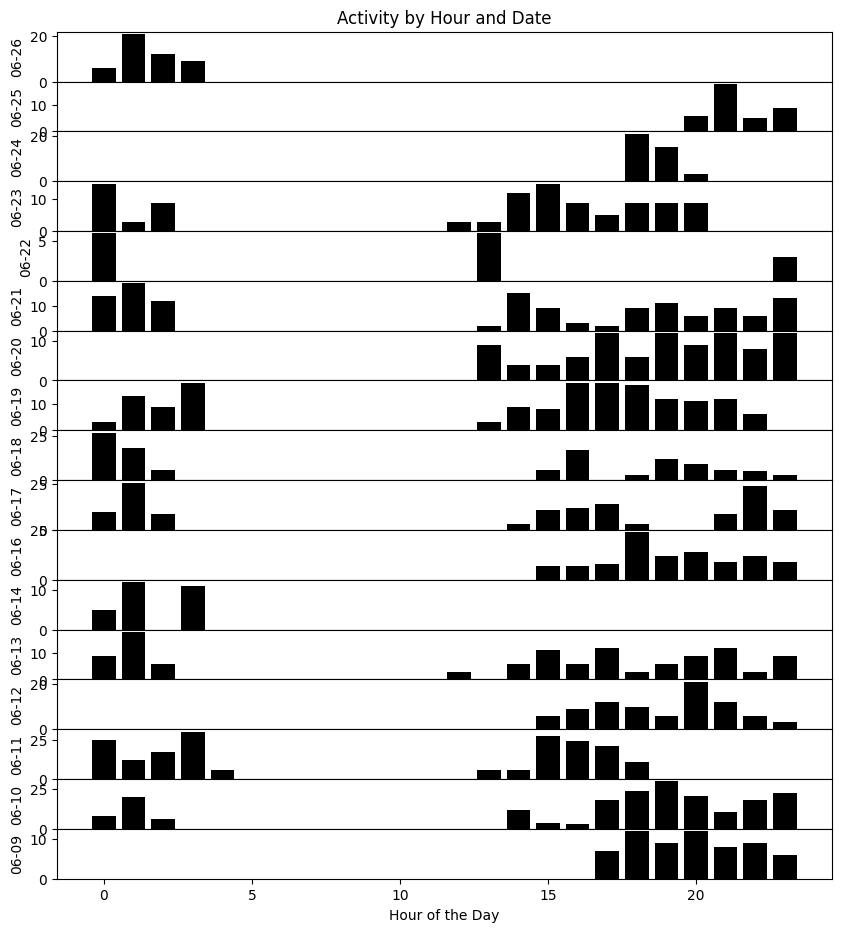

In [37]:
day_activity = defaultdict(lambda: [0]*24)

# Store the activity data for each day
for (date, hour), value in counts.items():
    day_activity[date][hour] = value

# Create a list of dates
dates = sorted(day_activity.keys())

# Create subplots
fig, axs = plt.subplots(len(dates), 1, figsize=(10, 11), sharex=True)

for ax, date in zip(axs[::-1], dates):
    # Plot a bar for each hour of activity
    ax.bar(range(24), day_activity[date], color='black')
    
    # Set the y label to the date
    ax.set_ylabel(date.strftime('%m-%d'))

# Set labels and title for the whole figure
axs[0].set_title('Activity by Hour and Date')
plt.xlabel('Hour of the Day')

# Adjust the space between the subplots to be 0
plt.subplots_adjust(hspace = 0)

plt.show()